# Unified UpLabel Pipeline

Testing ground for unified labeling pipeline.

In [25]:
import pandas as pd
import configparser
import sys

sys.path.append('../code')
import main
import utils as ut
import complexity as cp
import split as sp
import join as jo

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
config = configparser.ConfigParser()
config.read('../config.ini', encoding='utf-8')

['../config.ini']

In [5]:
data_dir = config['path']['data']

## Input 
Parameters & Upload.
- File (Raw Data + expert labelled)
- Column names
- Extra columns (to be ingored in processing, but output)
- Target column
- Language
- Task Type
- N# labelers (0..*)
- Quality: strict/easy (strict considers tags)

In [17]:
df = pd.read_csv(data_dir+'lab/input.txt', sep='\t', encoding='utf-8')
df.columns

Index(['label', 'text', 'tag'], dtype='object')

## Prepare Data

- Unified format
- remove duplicates
- Warning message for unknown items
- handle tags

In [137]:
%%time

ul = main.Main('lab', debug_iter_id=0)

[INFO] **** ITERATION # 0 ****
[INFO] Input Length -> 9245
[INFO] Label Summary: 
Web              77
Panorama         73
International    68
Sport            64
Wirtschaft       63
Inland           47
Etat             42
Wissenschaft     40
Kultur           26
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 9244


KeyboardInterrupt: 

In [138]:
%%time

ul = main.Main('tal', debug_iter_id=0)

[INFO] **** ITERATION # 0 ****
[INFO] Input Length -> 7766
[INFO] Label Summary: 
gracePeriodDate    47
None               28
damageDate         19
documentDate        7
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 3806
[INFO] Not enough examples for label ('documentDate', 5)
	[INFO] Found an empty row during text cleaning.
[INFO] Estimating complexity using UNSUPERVISED approach.
	[INFO] Complexity Score -> 0.503799962582972

[INFO] Applying model to data
	[INFO] Found an empty row during text cleaning.
[INFO] Storing split: C:/Users/makayser/Desktop/ul_local/tal/input-it_0-split_1.xlsx
documentDate       407
damageDate          36
gracePeriodDate     16
Name: pred, dtype: int64
[INFO] Storing split: C:/Users/makayser/Desktop/ul_local/tal/input-it_0-split_2.xlsx
documentDate       421
damageDate          42
gracePeriodDate     22
Name: pred, dtype: int64
Wall time: 5.17 s


In [160]:
t1, t2, t3 = jo.load_splits(data_dir + 'tal/', 0)

	[INFO] Quality Score of Labeler 1 -> 0.002178649237472767
	[INFO] Quality Score of Labeler 2 -> 0.0


In [164]:
tc = jo.join_splits(t1, t2)

In [165]:
len(tc)

3807

In [166]:
tc.lbl_score.drop_duplicates()

index
0       1.000000
1206    0.002179
2872    0.000000
Name: lbl_score, dtype: float64

In [170]:
tc.head()

,text,label,tag,iter_id,text_clean,lbl_score,comment
index,,,,,,,
0,11/01/2019 13: 46 037413006927 DR SCHUBEL & KO...,None,,0.0,11/01/2019 13 : 46 037413006927 dr schubel & k...,1.0,NaN
56,"fallig war(en). Wir bitten Sie, den Rechnungsa...",gracePeriodDate,,0.0,"fallig sein ( en ) . ich bitten ich , der rech...",1.0,NaN
54,"EUR 81,71 EUR Gesamt 511,77 EUR Zahlbar bis zum",gracePeriodDate,,0.0,"eur 81,71 eur gesamt 511,77 eur zahlbar bis zum",1.0,NaN
53,nicht gezahlt? Dann bitten wir um Erledigung b...,gracePeriodDate,,0.0,nicht zahlen ? dann bitten ich um erledigung b...,1.0,NaN
52,Arbeitsleistung und Fahrtkosten inkl. MwSt. en...,gracePeriodDate,,0.0,arbeitsleistung und fahrtkosten inklusive mehr...,1.0,NaN


In [91]:
len(t1)

4971

In [90]:
len(t2[1])

485

[INFO] **** ITERATION # 1 ****
[INFO] Loading splits from iteration 0.
[INFO] Input Length -> 5915
[INFO] Label Summary: 
documentDate       833
damageDate          94
gracePeriodDate     67
None                24
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 3806
	[INFO] Found an empty row during text cleaning.

[INFO] Estimating complexity using SUPERVISED approach.
	[INFO] Data available for training -> 986


C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.94       162
           1       0.88      0.39      0.54        18
           2       1.00      0.45      0.62        11
           3       0.00      0.00      0.00         4

   micro avg       0.89      0.89      0.89       195
   macro avg       0.69      0.46      0.52       195
weighted avg       0.87      0.89      0.86       195

	[INFO] Complexity Score -> 0.8871794871794871

[INFO] Applying model to data
	[INFO] Found an empty row during text cleaning.


C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


[INFO] Storing split: C:/Users/makayser/Desktop/ul_local/tal/input-it_1-split_1.xlsx
documentDate    9
damageDate      4
Name: pred, dtype: int64
[INFO] Storing split: C:/Users/makayser/Desktop/ul_local/tal/input-it_1-split_2.xlsx
documentDate    18
damageDate       1
Name: pred, dtype: int64
Wall time: 6.33 s


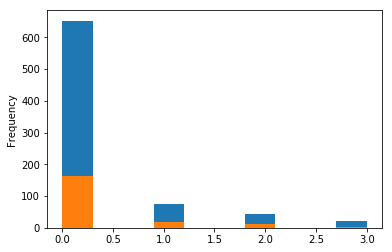

In [22]:
%%time

ul = main.Main('tal', debug_iter_id=1)

In [11]:
%%time

ul = main.Main('tal', debug_iter_id=2)

## Estimate Complexity


[INFO] Not enough examples for label ('documentDate', 5)
[INFO] Estimating complexity.
[INFO] Data available for training -> 74
[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.75      0.86         4
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        13
   macro avg       0.62      0.55      0.58        13
weighted avg       0.77      0.69      0.73        13



0.6923076923076923

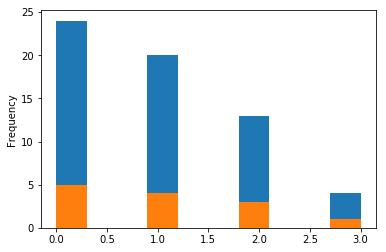

In [10]:
cp.run(df_data, estimate_clusters=False)

## Cluster
Only applies if complexity calculation not sufficient.

## Determine Split
Overlap

In [38]:
sp.calculate_split(3806, 0.73, 10)

(10, 0.27)

In [46]:
# splits = sp.apply_split(df_all, '../raw.txt', complexity=0.6, labelers=1)

## Output Split
- Split (x exports)
- Include extra columns
- Include label columns: scored, label, comment

### Output Instructions

- Labels:  
-- as defined   
-- None is 'None'  